#**Programación** 



#Biblioteca

In [1]:
import pandas as pd
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos 
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Desarrollo del codigo 

In [2]:
df=pd.read_csv("preferencias_de_contrato.csv", sep=";")

In [3]:
def aBinario(x):
  if x=="A":
    return 0
  else:
    return 1


In [4]:
df

,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo,edad,actividad,genero,q olivas,q aceite,q residuo,localizacion,inversion,innovacion,cooperativa,sc contrato
0,1,70,A,B,A,B,A,50,28,1,634,90,260,1,0,1,1,0
1,1,60,B,A,A,A,A,65,40,1,543,112,250,2,1,0,0,1
2,1,68,B,A,A,B,A,46,15,0,576,85,271,1,1,0,0,1
3,1,50,A,A,A,B,A,57,30,1,864,49,355,3,1,1,1,0
4,0,29,B,A,B,A,A,36,8,0,475,74,195,4,1,1,0,0
5,0,55,B,B,A,A,B,33,5,1,280,44,135,1,0,0,0,1
6,0,43,B,B,B,B,B,45,10,1,360,59,170,1,0,1,1,1
7,0,48,B,B,A,B,B,62,12,0,465,72,186,4,0,0,1,1
8,0,43,B,B,A,A,A,32,5,0,235,40,113,7,1,1,1,1
9,1,63,A,B,A,B,B,45,23,1,750,125,338,8,1,1,0,0


#Estadística descriptiva de las variables numéricas 

In [5]:
#estadística descriptiva de las variables numéricas no binarias
tabla2=df.iloc[0:len(df),7:18]
tabla2
tabla2.describe()


,edad,actividad,genero,q olivas,q aceite,q residuo,localizacion,inversion,innovacion,cooperativa,sc contrato
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,44.097561,11.682927,0.487805,510.609756,84.975610,236.878049,6.756098,0.658537,0.609756,0.560976,0.560976
std,12.206156,9.719668,0.506061,215.270746,36.242577,101.499802,4.109626,0.480091,0.493865,0.502433,0.502433
min,26.000000,1.000000,0.000000,160.000000,19.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,5.000000,0.000000,345.000000,59.000000,170.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,8.000000,0.000000,475.000000,83.000000,213.000000,8.000000,1.000000,1.000000,1.000000,1.000000
75%,52.000000,17.000000,1.000000,634.000000,100.000000,289.000000,10.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,40.000000,1.000000,951.000000,163.000000,484.000000,14.000000,1.000000,1.000000,1.000000,1.000000


#Matriz de Correlación 1

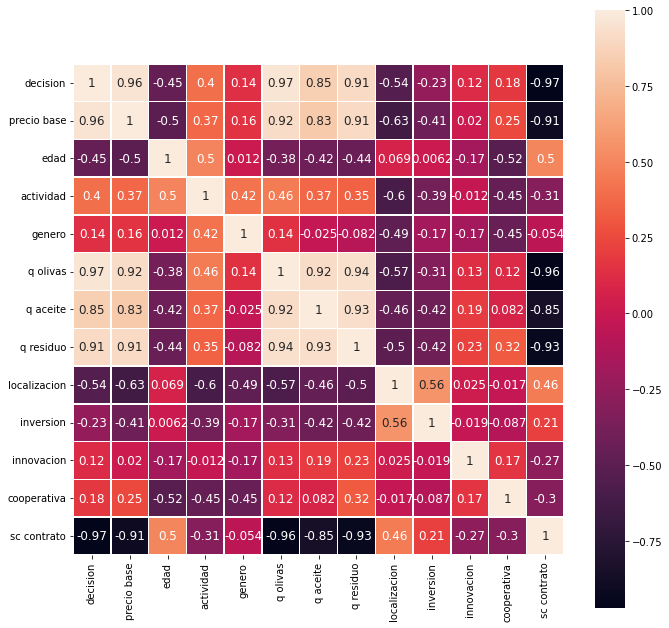

In [6]:
#matriz de correlaciones
cor=df.corr()
#mapa de calor
fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(cor.corr(), annot=True, annot_kws={"size":12}, square=True, linecolor="w",linewidths=0.5)

#Desarrollo del codigo

In [7]:

decision=df.decision
pbase=df["precio base"]
edad=df.edad	
actividad=df.actividad	
genero=df.genero	
olivas=df["q olivas"]	
aceite=df["q aceite"]	
residuo=df["q residuo"]	
loc=df.localizacion	
inversion=df.inversion	
innova=df.innovacion	
cooperativa=df.cooperativa	
contrato=df["sc contrato"]



#Gráfico 1: Participación vs Cantidad 

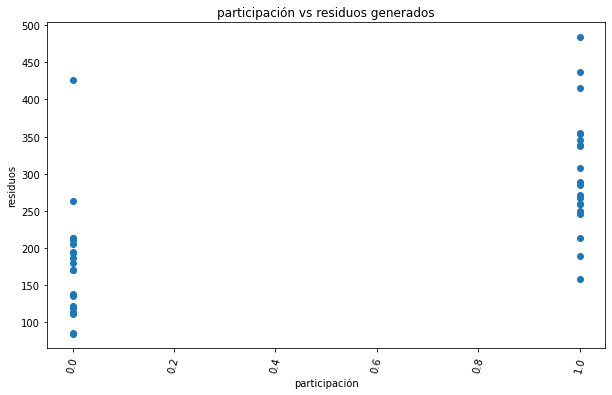

In [8]:
#scatter
plt.figure(figsize=(10,6)) #lienzo
plt.xticks(rotation=75 ) #se rotan los nombres en el eje x
#titulo
plt.title("participación vs residuos generados")
#nombre de los ejes
plt.xlabel("participación")
plt.ylabel("residuos")
plt.scatter(decision, residuo) #graficar por nube de puntos
plt.show()

#Modelo 1

In [9]:
#se hace un modelo de regresión con las variables numéricas de mayor correlación
modelo=smf.ols("decision ~pbase+residuo + contrato",df)
result=modelo.fit()
print(result.summary())
#los coeficientes de regresión son significativos

                            OLS Regression Results                            
Dep. Variable:               decision   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     65.36
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           7.45e-15
Time:                        02:07:39   Log-Likelihood:                 7.9834
No. Observations:                  41   AIC:                            -7.967
Df Residuals:                      37   BIC:                            -1.113
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3586      0.208     -1.720      0.0

In [10]:
#Se puede ver que las variables cantidad de residuo, precio base y contratos previos tienen influencia significativa sobre la decisión

#Desarrollo del codigo



In [11]:
# se transforman las variables dicotomicas a binarias
df["longitud de contrato"]=df["longitud de contrato"].apply(aBinario)
df["renegociacion"]=df["renegociacion"].apply(aBinario)
df["capacitacion obligatoria"]=df["capacitacion obligatoria"].apply(aBinario)
df["volumen minimo"]=df["volumen minimo"].apply(aBinario)
#df["precio base"]=df["precio base"].apply(aBinario)
df["precio minimo garantizado"]=df["precio minimo garantizado"].apply(aBinario)

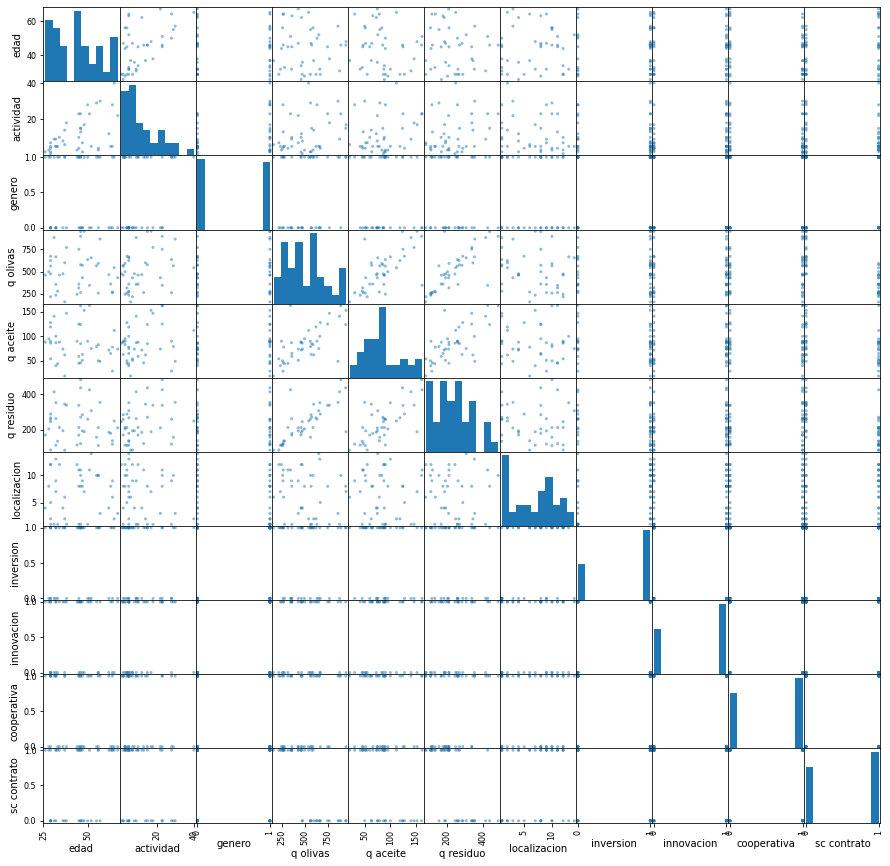

In [12]:
pd.plotting.scatter_matrix(tabla2,figsize=(15,15)); #gráficos varios, para tener apoyo visual relacional

In [13]:
#se apartan las variables no numericas
tabla3=df.iloc[0:len(df),0:7]
tabla3

,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo
0,1,70,0,1,0,1,0
1,1,60,1,0,0,0,0
2,1,68,1,0,0,1,0
3,1,50,0,0,0,1,0
4,0,29,1,0,1,0,0
5,0,55,1,1,0,0,1
6,0,43,1,1,1,1,1
7,0,48,1,1,0,1,1
8,0,43,1,1,0,0,0
9,1,63,0,1,0,1,1


In [14]:
tabla3["contrato"] = df["sc contrato"]

In [15]:
base=tabla3["precio base"]
Pminimo=tabla3["precio minimo garantizado"]
longitud=tabla3["longitud de contrato"]
renegociacion=tabla3["renegociacion"]
capacitacion=tabla3["capacitacion obligatoria"]
Vminimo=tabla3["volumen minimo"]
SCcontrato=df["sc contrato"]

#Matriz de Correlación 2

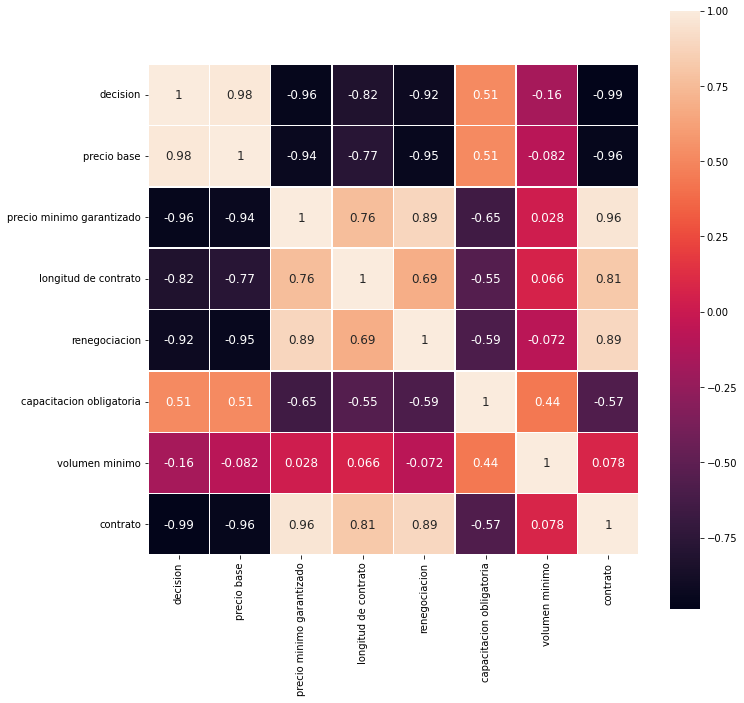

In [16]:
cor2=tabla3.corr()
#mapa de calor
fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(cor2.corr(), annot=True, annot_kws={"size":12}, square=True, linecolor="w",linewidths=0.5)

#Modelo 2

In [17]:
#se hace un modelo de regresión con las variables no numéricas de mayor correlación
modelo=smf.ols("decision ~Pminimo+longitud+renegociacion+Vminimo+ contrato",tabla3)
result=modelo.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               decision   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     20.06
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.12e-09
Time:                        02:07:45   Log-Likelihood:                -2.0280
No. Observations:                  41   AIC:                             16.06
Df Residuals:                      35   BIC:                             26.34
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0626      0.077     13.834

In [18]:
#El modelo no resulta particularmente significativo
#Debido a que sus coeficientes de regresión pueden ser 0 para todas las variables a excepción de "contratos" y renegociación

#Modelo 3

In [19]:
#Realiza una nueva regresión, considerando las variables más significación
modelo2=smf.ols("decision ~SCcontrato+renegociacion",df)
result=modelo2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               decision   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     44.76
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.02e-10
Time:                        02:07:45   Log-Likelihood:                -4.9273
No. Observations:                  41   AIC:                             15.85
Df Residuals:                      38   BIC:                             21.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9879      0.069     14.310

In [20]:
#Se consigue un modelo probit de solo variables significativas, se considera apto para estimar la decisión

#Desarrollo del codigo

In [21]:
#De la mejor regresión se hace una lista de coeficientes de regresion
y2=tabla3["decision"]
X2=[tabla3["contrato"],tabla3["renegociacion"]]
X2 = np.transpose(X2) 
X2 = np.c_[X2, np.ones(X2.shape[0])]  
linreg = np.linalg.lstsq(X2, y2, rcond=None)[0]
print(linreg)

[-0.67617175 -0.2605703   0.98787283]


In [22]:
coef=linreg #coeficientes de regresión
coef

array([-0.67617175, -0.2605703 ,  0.98787283])

In [23]:
i=0
listaEst=[]
while i<len(tabla3):
  fila= tabla3.iloc [i:i+1]
  estimacion=coef[-1]+ coef[0]*fila["contrato"]+coef[1]*fila["renegociacion"]
  listaEst.append (estimacion)
  i=i+1

In [24]:
listaEst #lista de estimaciones de probabilidad

[0    0.987873
 dtype: float64, 1    0.311701
 dtype: float64, 2    0.311701
 dtype: float64, 3    0.987873
 dtype: float64, 4    0.727303
 dtype: float64, 5    0.311701
 dtype: float64, 6    0.051131
 dtype: float64, 7    0.311701
 dtype: float64, 8    0.311701
 dtype: float64, 9    0.987873
 dtype: float64, 10    0.727303
 dtype: float64, 11    0.051131
 dtype: float64, 12    0.987873
 dtype: float64, 13    0.987873
 dtype: float64, 14    0.051131
 dtype: float64, 15    0.987873
 dtype: float64, 16    0.051131
 dtype: float64, 17    0.311701
 dtype: float64, 18    0.987873
 dtype: float64, 19    0.987873
 dtype: float64, 20    0.051131
 dtype: float64, 21    0.051131
 dtype: float64, 22    0.987873
 dtype: float64, 23    0.051131
 dtype: float64, 24    0.987873
 dtype: float64, 25    0.051131
 dtype: float64, 26    0.987873
 dtype: float64, 27    0.051131
 dtype: float64, 28    0.051131
 dtype: float64, 29    0.311701
 dtype: float64, 30    0.051131
 dtype: float64, 31    0.051131
 d

In [25]:
dic={"probabilidad": listaEst}

In [26]:
df["probabilidad"]=pd.DataFrame(dic) #se agrega la columna probabilidad al dataframe original
tabla3["probabilidad"]=pd.DataFrame(dic) #se agrega la columna probabilidad al dataframe tabla 3

#Gráfico 2: Participación vs Precio base

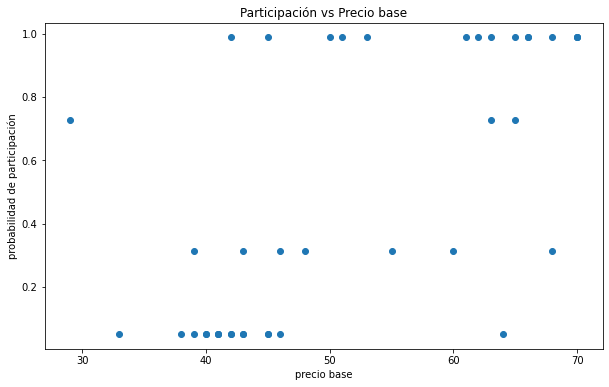

In [27]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=tabla3["precio base"],y=tabla3["probabilidad"])
ax.set(ylabel="probabilidad de participación",xlabel="precio base")
plt.title("Participación vs Precio base")
plt.show()

#Desarrollo del codigo

In [28]:
def ajustarProb(x):
  if x>1:
    x=1
  elif x<0:
    x=0
  return x


In [29]:
def aFloat(x):
  return float(x)

In [30]:
tabla3["probabilidad"]=tabla3["probabilidad"].apply(aFloat)
df["probabilidad"]=df["probabilidad"].apply(aFloat)

In [31]:
tabla3["probabilidad"]=tabla3["probabilidad"].apply(ajustarProb)
df["probabilidad"]=df["probabilidad"].apply(ajustarProb)

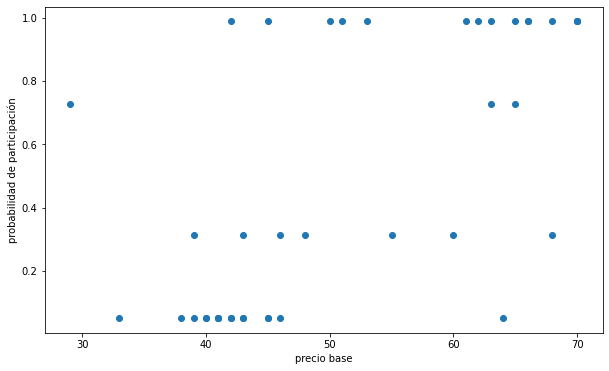

In [32]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=tabla3["precio base"],y=tabla3["probabilidad"])
ax.set(ylabel="probabilidad de participación",xlabel="precio base")
plt.show()

#Desarrollo del codigo

In [33]:
orden=tabla3.sort_values(by=["volumen minimo"])
orden.head(25) #las primeras 25 filas tienen volumen minimo 0



,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo,contrato,probabilidad
0,1,70,0,1,0,1,0,0,0.987873
36,0,41,1,1,1,0,0,1,0.051131
35,1,65,1,0,1,0,0,0,0.727303
33,0,45,1,1,1,0,0,1,0.051131
32,0,42,1,0,1,0,0,1,0.051131
31,0,45,1,1,1,0,0,1,0.051131
30,0,41,1,1,1,1,0,1,0.051131
29,0,39,0,1,0,0,0,1,0.311701
28,0,40,1,1,1,0,0,1,0.051131
26,1,45,0,0,0,0,0,0,0.987873


In [34]:
ordenV=[]

In [35]:
for elemento in orden["volumen minimo"]:
  ordenV.append(elemento)


In [36]:
df2=orden

In [37]:
rango=list(range(0,len(df)))
rango

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [38]:
df2.index=rango
df2.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40],
           dtype='int64')

In [39]:
df2.head(2)

,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo,contrato,probabilidad
0,1,70,0,1,0,1,0,0,0.987873
1,0,41,1,1,1,0,0,1,0.051131


In [40]:
corte=0
i=0
while i<len(df)-1:
  valor=df2["volumen minimo"][i]
  siguiente=df2["volumen minimo"][i+1]
  if valor!= siguiente and i!=0:
    corte = i
  i=i+1

In [41]:
corte

24

In [42]:
 orden.tail(16) #las últimas 16 filas tienen volumen mínimo 1

,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo,contrato,probabilidad
25,0,41,1,1,1,0,1,1,0.051131
26,1,66,0,0,0,0,1,0,0.987873
27,0,43,1,1,1,1,1,1,0.051131
28,0,46,1,0,0,1,1,1,0.311701
29,1,65,0,0,0,1,1,0,0.987873
30,1,70,0,0,0,1,1,0,0.987873
31,1,70,0,0,0,1,1,0,0.987873
32,0,55,1,1,0,0,1,1,0.311701
33,0,48,1,1,0,1,1,1,0.311701
34,0,46,1,1,1,1,1,1,0.051131


In [43]:
#se separa la muestra en 2 df, uno con volumen minimo, y otro sin volumen minimo
grupo1=orden.iloc[0:corte,0:9] #volumen minimo 0 contrato A 
grupo2=orden.iloc[corte:len(orden),0:9] #volumen minimo 1 contrato B 

In [44]:
grupo1.shape #se comprueban los tamaños de los grupos

(24, 9)

In [45]:
grupo2.shape

(17, 9)

In [46]:
grupo1

,decision,precio base,precio minimo garantizado,longitud de contrato,renegociacion,capacitacion obligatoria,volumen minimo,contrato,probabilidad
0,1,70,0,1,0,1,0,0,0.987873
1,0,41,1,1,1,0,0,1,0.051131
2,1,65,1,0,1,0,0,0,0.727303
3,0,45,1,1,1,0,0,1,0.051131
4,0,42,1,0,1,0,0,1,0.051131
5,0,45,1,1,1,0,0,1,0.051131
6,0,41,1,1,1,1,0,1,0.051131
7,0,39,0,1,0,0,0,1,0.311701
8,0,40,1,1,1,0,0,1,0.051131
9,1,45,0,0,0,0,0,0,0.987873


#Gráfico 1: Probabilidad vs Precio base (Grupo 1)


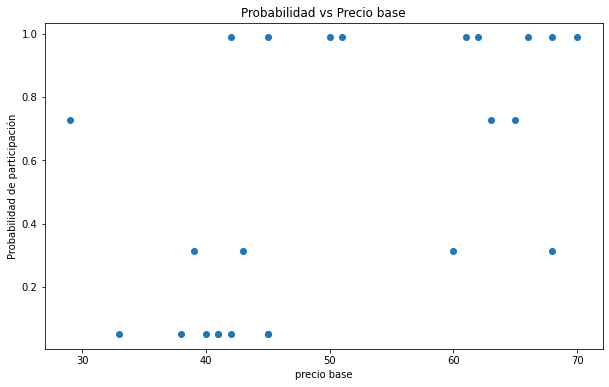

In [47]:
#grupo 1 gráfico
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=grupo1["precio base"],y=grupo1["probabilidad"])
ax.set(ylabel="Probabilidad de participación",xlabel="precio base", title="Probabilidad vs Precio base")

plt.show()

#Gráfico 2: Probabilidad vs Precio base (Grupo2)

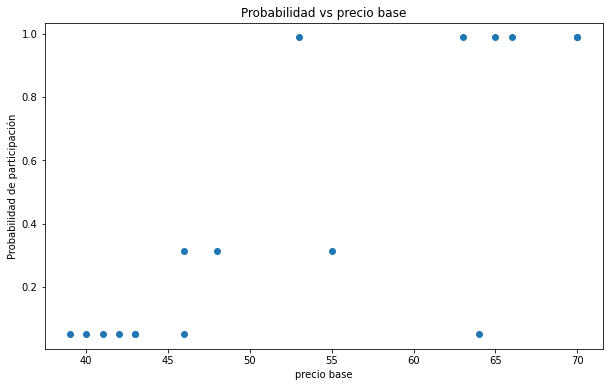

In [48]:
# grupo 2 gráfico
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=grupo2["precio base"],y=grupo2["probabilidad"])
ax.set(ylabel="Probabilidad de participación",xlabel="precio base", title="Probabilidad vs precio base")

plt.show()

#Gráfico 3 (Gráfico conjunto Grupos 1 y 2)


<function matplotlib.pyplot.show>

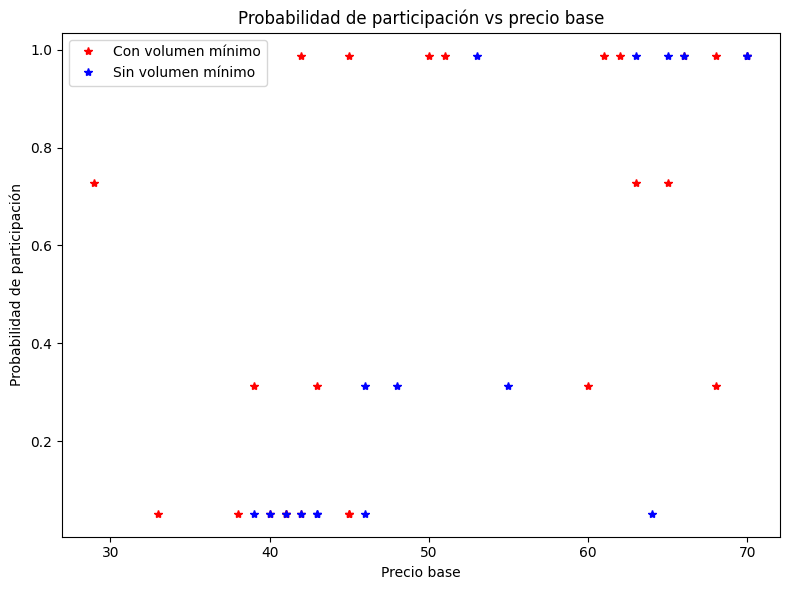

In [49]:
fig, (ax1)= plt.subplots(figsize=(8,6), dpi=100, sharey=True)
#(x=grupo2["precio base"],y=grupo2["probabilidad"]

ax1.plot(grupo1["precio base"],grupo1["probabilidad"] ,"b*", color="r", label="Con volumen mínimo") #con volumen mínimo
ax1.plot(grupo2["precio base"], grupo2["probabilidad"],"b*", color="b", label="Sin volumen mínimo") #sin volumen mínimo
plt.legend(loc="best")

#ax1.set_title ("Con volumen mínimo de producción")
#ax2.set_title ("Sin volumen mínimo de producción")

ax1.set_xlabel ("Precio base")
#ax2.set_xlabel ("Precio base")

ax1.set_ylabel ("Probabilidad de participación")
#ax2.set_ylabel ("Probabilidad de participación")
plt.title("Probabilidad de participación vs precio base")


plt.tight_layout ()
plt.show